In [451]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data/data.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


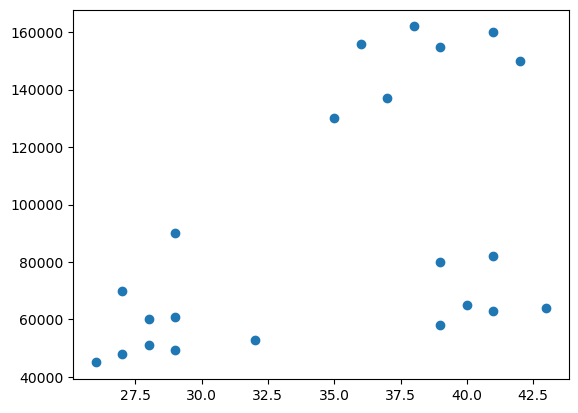

In [452]:
plt.scatter(df.Age , df['Income($)'])

In [453]:
km = KMeans(n_clusters=3)

In [454]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted		# predicted cluster

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [455]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,2


/tmp/ipykernel_132935/84080886.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


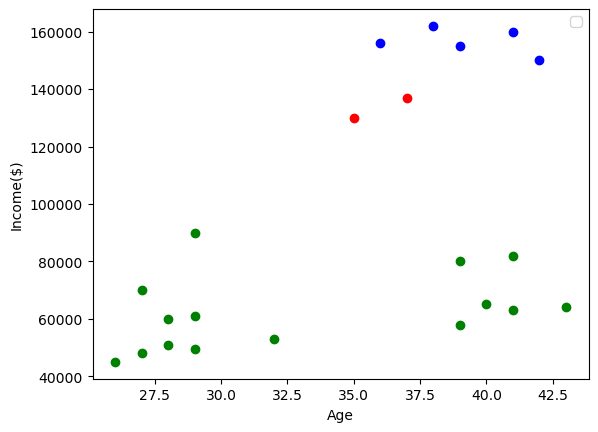

In [456]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='red')
plt.scatter(df2.Age, df2['Income($)'], color='green')
plt.scatter(df3.Age, df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

see in above example blue and cluster is not forming correctly because x and y axis are not scaled properly, below is how to do scaling

In [457]:
scaler = MinMaxScaler()

# scaling income 
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# scaling age
scaler.fit(df[['Age']])
df['Age'] = scaler.fit_transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [458]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Income($)', 'Age']])

df['cluster'] = y_predicted

now after scaling the scatter plot show better clustering

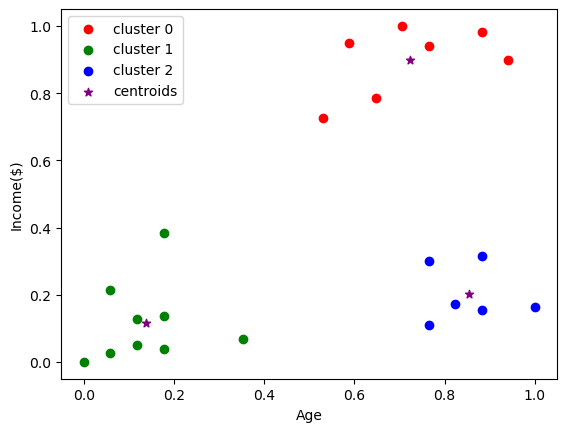

In [459]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Age, df1['Income($)'], color='red', label='cluster 0')
plt.scatter(df2.Age, df2['Income($)'], color='green', label='cluster 1')
plt.scatter(df3.Age, df3['Income($)'], color='blue', label='cluster 2')
plt.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 0], marker='*',color='purple', label='centroids')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

cluster centroids

In [460]:
km.cluster_centers_

array([[0.8974359 , 0.72268908],
       [0.11633428, 0.1372549 ],
       [0.2022792 , 0.85294118]])

Elbow Plot Method - used to find ideal k value for k means clustering mode

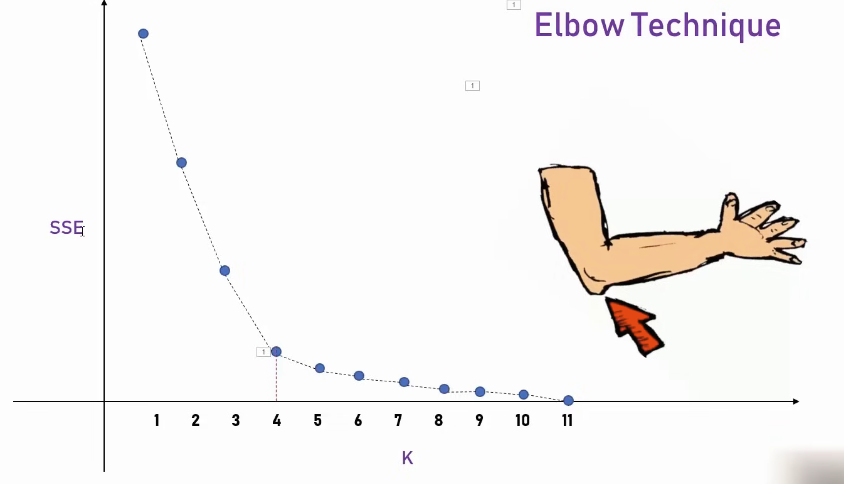

In [461]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
	km = KMeans(n_clusters=k)
	km.fit(df[['Age', 'Income($)']])
	sse.append(km.inertia_) # for a kmeans model inertia_ give sse

In [462]:
sse


[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3881529166478744,
 0.2766936276300279,
 0.24591705034877784,
 0.19879303594775455,
 0.17240085311259862,
 0.12504653758905085]

Text(0, 0.5, 'SSE')

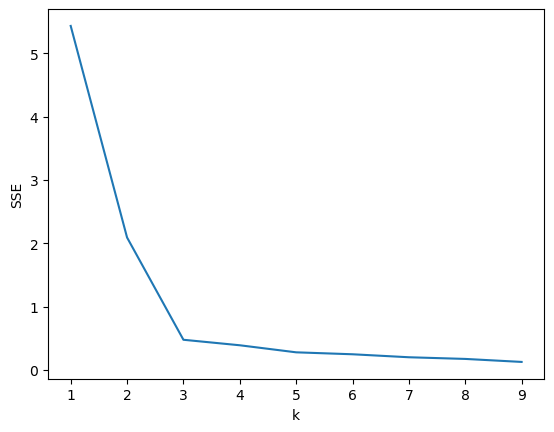

In [463]:
plt.plot(k_rng, sse)
plt.xlabel('k')
plt.ylabel('SSE')

elbow on k=3 indicates that 3 is ideal k value 